# **Step 1: Import Libraries and Load Data**

**First, import the necessary libraries and load the MNIST dataset.**


In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
import matplotlib.pyplot as plt

#load the dataset
(data_train, label_train), (data_test, label_test) = mnist.load_data()

print(data_train.shape)
print(label_train.shape)

#Normalize the pixel values
data_train = data_train / 255.0
data_test = data_test / 255.0

(60000, 28, 28)
(60000,)


# **Step 2: Preprocess Data**

**Since the MNIST images are grayscale (1 channel), we need to add an extra dimension to the data to match the expected input shape of the model.**

In [2]:
#Add a channel dimension
data_train = data_train[..., tf.newaxis]
data_test = data_test[..., tf.newaxis]

# **Step 3: Build the Model**
**Create a Convolutional Neural Network (CNN) using the Keras API.**

In [3]:
model = models.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# **Step 4: Compile the Model**
**Specify the optimizer, loss function, and metrics for the model.**

In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# **Step 5: Train the Model**
**Train the model on the training data.**

In [5]:
history = model.fit(data_train, label_train, epochs=10,
                    validation_data=(data_test, label_test))

Epoch 1/10
1875/1875 [==============================] - 82s 42ms/step - loss: 0.1441 - accuracy: 0.9556 - val_loss: 0.0384 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0359 - val_accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0318 -

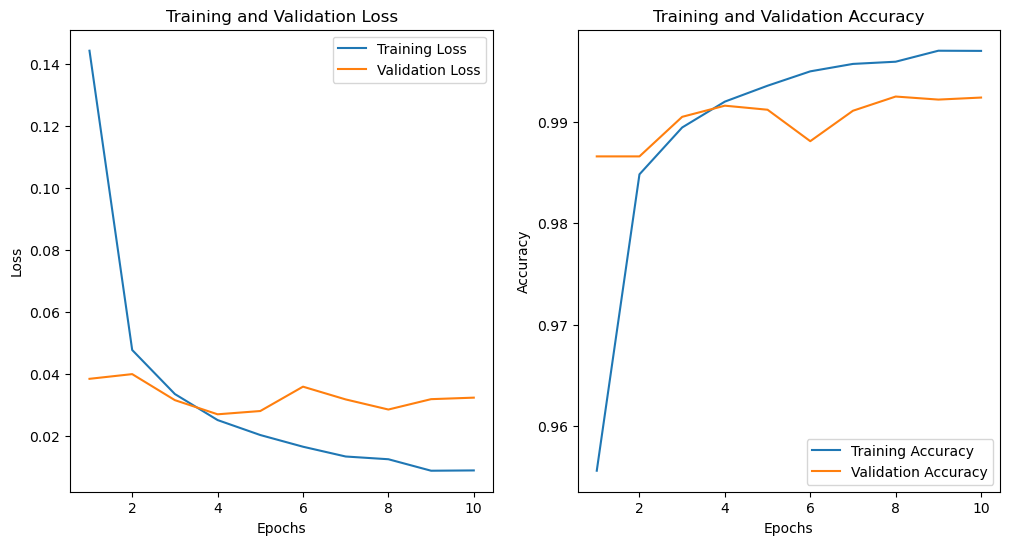

In [7]:

# Extract loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create epochs range
epochs_range = range(1, len(train_loss) + 1)

# Plot Loss vs Epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()


# **Step 6: Evaluate the Model**
**Evaluate the model on the test data to check its performance.**

In [8]:
test_loss, test_acc = model.evaluate(data_test, label_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0323 - accuracy: 0.9924 - 1s/epoch - 5ms/step

Test accuracy: 0.9923999905586243


# **Step 7: Make Predictions**
**Use the trained model to make predictions on new data.**

313/313 [==============================] - 2s 5ms/step


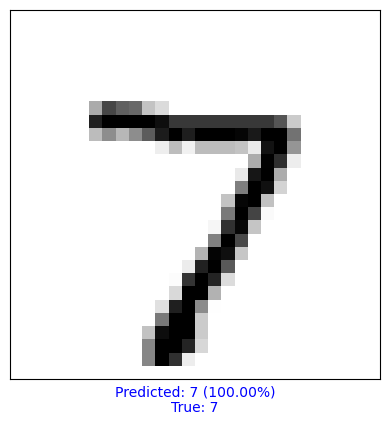

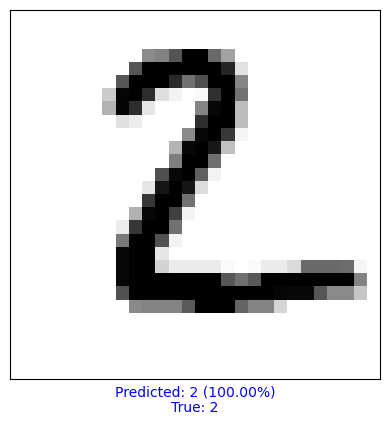

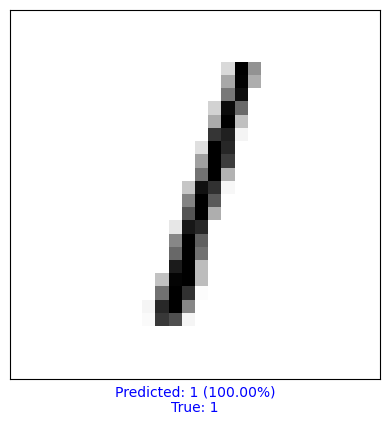

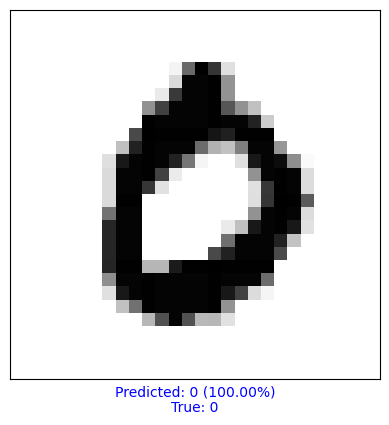

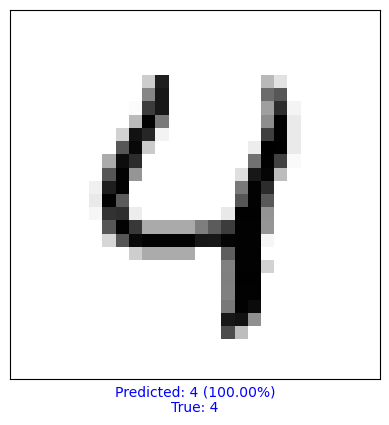

In [9]:
predictions = model.predict(data_test)

for i in range(5):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_test[i], cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = label_test[i]
    max_probability = 100 * max(predictions[i])

    if predicted_label == true_label and max_probability > 70:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'Predicted: {predicted_label} ({100 * max(predictions[i]):.2f}%)\nTrue: {true_label}', color=color)
    plt.show()